In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df= pd.read_csv('/content/car_prediction_data.csv')

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.shape

(301, 9)

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [12]:
df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64


In [13]:
df.drop('Car_Name', axis=1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [15]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

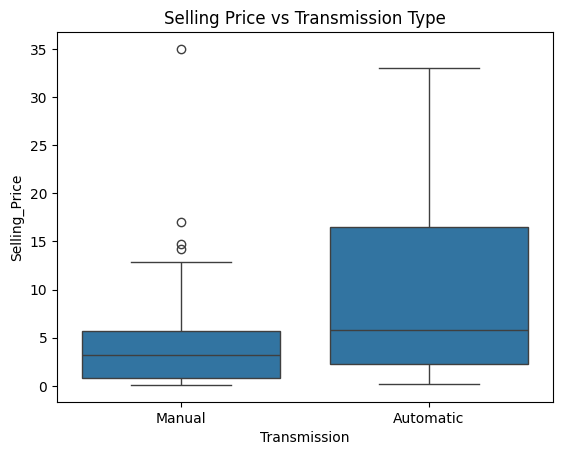

In [16]:
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Selling Price vs Transmission Type")
plt.show()

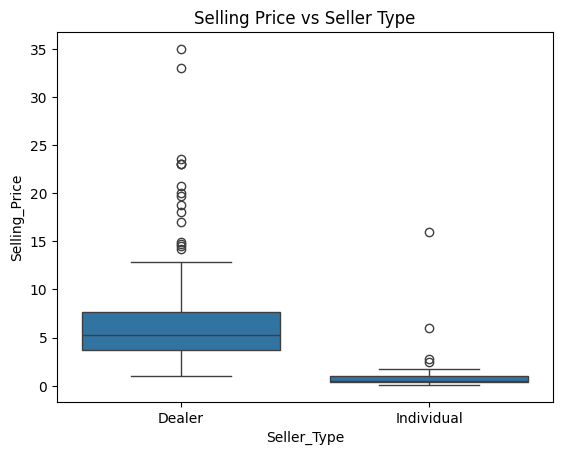

In [17]:
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title("Selling Price vs Seller Type")
plt.show()

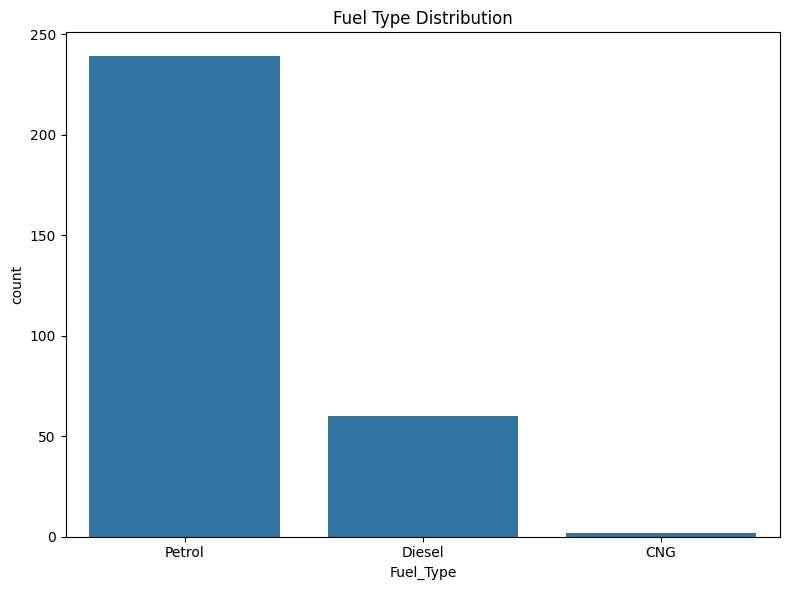

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Fuel_Type')
plt.title("Fuel Type Distribution")
plt.tight_layout()
plt.show()

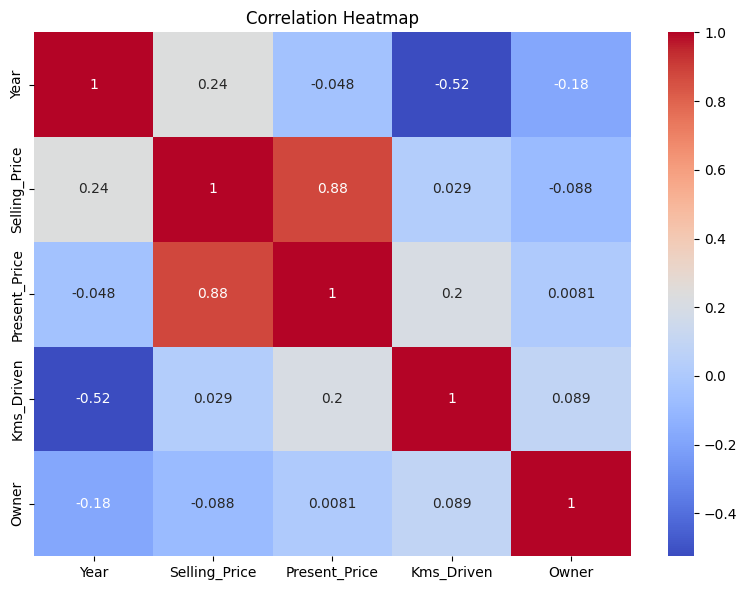

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

In [20]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
# One Hot Encoding
df_up= pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first= True,dtype=int)
df_up

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,1,0,1
298,city,2009,3.35,11.00,87934,0,0,1,0,1
299,city,2017,11.50,12.50,9000,0,1,0,0,1


In [28]:
df.shape

(301, 9)

In [29]:
df_up.shape

(301, 10)

In [35]:
df_up.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
5,2018,9.25,9.83,2071,0,1,0,0,1
6,2015,6.75,8.12,18796,0,0,1,0,1
7,2015,6.50,8.61,33429,0,1,0,0,1
8,2016,8.75,8.89,20273,0,1,0,0,1
9,2015,7.45,8.92,42367,0,1,0,0,1


In [36]:
print(df_up.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    301 non-null    int64  
 1   Selling_Price           301 non-null    float64
 2   Present_Price           301 non-null    float64
 3   Kms_Driven              301 non-null    int64  
 4   Owner                   301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    int64  
 6   Fuel_Type_Petrol        301 non-null    int64  
 7   Seller_Type_Individual  301 non-null    int64  
 8   Transmission_Manual     301 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.3 KB
None


In [39]:
x= df_up.drop('Selling_Price',axis=1)
y=df_up['Selling_Price']

In [40]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred=model.predict(x_test)

In [43]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8489813024897594
MSE: 3.478803970641293


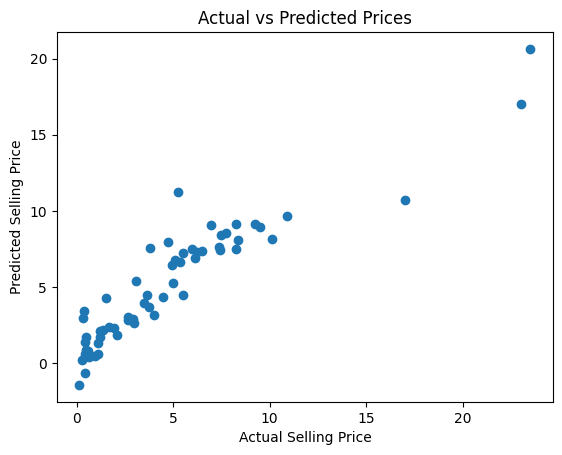

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Prices")
plt.show()